In [2]:
import pandas as pd
import os

In [ ]:
pip install pandas xlrd

### 엑셀 파일이 있는 폴더를 입력하면 모두 CSV파일로 변환

In [ ]:
input_folder = './data/데이터2/홍어csv/2024'   # 엑셀 파일이 있는 폴더 경로
output_folder = './data/홍어csv/2024'    # 변환된 파일을 저장할 폴더 경로

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for file in os.listdir(input_folder):
    if file.endswith('.xls'):
        xls_path = os.path.join(input_folder, file)
        csv_path = os.path.join(output_folder, file.replace('.xls', '.csv'))
        
        # xls 파일을 읽고 DataFrame으로 변환
        df = pd.read_excel(xls_path, engine='xlrd')
        
        # CSV로 저장
        df.to_csv(csv_path, index=False, encoding='utf-8-sig')
        print(f'{file} → CSV 변환 완료')

print('모든 XLS 파일 CSV 변환 완료!')

### CSV파일에 날짜 컬럼 추가하기

In [9]:
lis = ['오징어', '전복', '조기', '홍어', '꽁치', '대구', '바지락']

dfs = []

for fish in lis:
    for year in range(2021, 2025):
        for month in range(1, 13):
            file = f'./data/{fish}csv/{year}/{year}-{month}.csv'
            if os.path.exists(file):
                df = pd.read_csv(file, encoding='utf-8')
                df['어종'] = fish  # 파일 기준 어종 추가
                df['year'] = year
                df['month'] = month
                dfs.append(df)

# 여러 DataFrame을 하나로 합침
df = pd.concat(dfs, ignore_index=True)

# 연월을 datetime 형식으로 변환 (일자를 1로 고정)
df['date'] = pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))

# 결과 확인
print(df.head())

    어종   산지   규격   포장  수량    중량     낙찰고가     낙찰저가      평균가  year  month  \
0  오징어   군산   5코  S/P   5  10.0   18,000   18,000   18,000  2021      1   
1  오징어   군산    중  box  39   5.0   13,300    1,500   10,700  2021      1   
2  오징어   장항  10코  box   3  10.0   15,000   15,000   15,000  2021      1   
3  오징어  제주도  21미  S/P  14   8.0   70,000   70,000   70,000  2021      1   
4  오징어  제주도    중  S/P   1  12.0  100,000  100,000  100,000  2021      1   

        date  
0 2021-01-01  
1 2021-01-01  
2 2021-01-01  
3 2021-01-01  
4 2021-01-01  


/var/folders/p6/kff249cn76scx1tv7jch4vym0000gn/T/ipykernel_50565/2749316472.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs, ignore_index=True)


In [ ]:
# datetime 형식
df['date'] = pd.to_datetime(
    dict(year=df['year'], month=df['month'], day=1)
)

### CSV파일로 반환하기

In [5]:
df.to_csv('./data/전복csv/전복.csv', index=False, encoding='utf-8-sig')

### 어종의 종류컬럼 추가

In [7]:
import pandas as pd
import glob
import os

# 1. 파일 경로 리스트 작성
fish_list = ['갈치', '명태', '고등어', '우럭', '넙치', '꽁치', '대구', '바지락', '오징어', '전복', '조기', '홍어']
dataframes = []

for fish in fish_list:
    file_path = f'./data/{fish}csv/{fish}.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        df['파일어종'] = fish  # 원 파일의 어종정보
        dataframes.append(df)

# 2. 데이터프레임 통합
all_fish = pd.concat(dataframes, ignore_index=True)

# 3. 어종 컬럼에서 전처리(냉, 선, 활 등)와 공통어종 추출
def process_species(x):
    # 패턴: (냉)꽁치, (선)학꽁치 등 → 전처리: 냉/선/활, 공통어종: 꽁치, 학꽁치 등
    if pd.isnull(x):
        return ('일반', x)
    import re
    match = re.match(r'\((.*?)\)(.*)', x)
    if match:
        pre = match.group(1)
        species = match.group(2).strip()
        return (pre, species)
    else:
        return ('일반', x.strip())

all_fish[['전처리', '공통어종']] = all_fish['어종'].apply(lambda x: pd.Series(process_species(x)))

# 4. 예시 결과 확인
print(all_fish[['어종', '전처리', '공통어종', '파일어종']].head())

# 필요시 : 중간 중복 제거/정제
all_fish['공통어종'] = all_fish['공통어종'].replace('', '미상')  # 빈값 처리

# 5. 활용 예시
# 공통어종별 집계, 전처리별 집계 등 자유롭게 가능
# all_fish.groupby(['공통어종', '전처리']).size()



      어종 전처리 공통어종 파일어종
0  (선)갈치   선   갈치   갈치
1  (선)갈치   선   갈치   갈치
2  (선)갈치   선   갈치   갈치
3  (선)갈치   선   갈치   갈치
4  (선)갈치   선   갈치   갈치


In [8]:
all_fish

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,year,month,date,파일어종,전처리,공통어종
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000",110000,2021,1,2021-01-01,갈치,선,갈치
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000",141700,2021,1,2021-01-01,갈치,선,갈치
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000",99000,2021,1,2021-01-01,갈치,선,갈치
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000",138600,2021,1,2021-01-01,갈치,선,갈치
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000",200000,2021,1,2021-01-01,갈치,선,갈치
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500","8,500",2024,12,NaN,홍어,선,홍어
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500","4,800",2024,12,NaN,홍어,선,홍어
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000","3,100",2024,12,NaN,홍어,선,홍어
37553,(선)홍어,방어진,6미,kg,49,1.0,"4,000","4,000","4,000",2024,12,NaN,홍어,선,홍어


In [ ]:
# 불필요한 '파일어종' 컬럼 제거
df = all_fish.drop(columns=['파일어종'])

#### 데이터 가공

In [11]:
import pandas as pd
import os

lis = ['명태','고등어','우럭','갈치','넙치',
    '오징어', '전복', '조기', '홍어', '꽁치', '대구', '바지락']
dfs = []

for fish in lis:
    for year in range(2021, 2025):
        for month in range(1, 13):
            file = f'./data/{fish}csv/{year}/{year}-{month}.csv'
            if os.path.exists(file):
                df = pd.read_csv(file, encoding='utf-8')
                df['공통어종'] = fish
                df['year'] = year
                df['month'] = month
                dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

# 연월을 datetime 형식으로 변환 (일자는 1로 고정)
df['date'] = pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))

# 최종 필요한 컬럼만 선택적으로 남길 수 있음
# 예: df = df[['어종', 'year', 'month', 'date'] + (기타 원본 데이터컬럼)]

# 데이터 csv 파일로 저장
df.to_csv('./data/수산물_통합_날짜만.csv', index=False, encoding='utf-8-sig')


/var/folders/p6/kff249cn76scx1tv7jch4vym0000gn/T/ipykernel_50565/1780914051.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs, ignore_index=True)


In [14]:
df

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,공통어종,year,month,date
0,(선)명태,일본,중,S/P,5,10.0,"60,000","60,000","60,000",명태,2021,1,2021-01-01
1,(냉)명태,러시아,6통,PAN(펜),"2,117",21.5,"33,600","24,500","25,700",명태,2021,1,2021-01-01
2,(냉)명태,러시아,4통,PAN(펜),246,21.5,"47,200","46,700","46,900",명태,2021,1,2021-01-01
3,(냉)명태,러시아,9통,PAN(펜),220,21.5,"30,500","30,500","30,500",명태,2021,1,2021-01-01
4,(냉)명태,러시아,3통,PAN(펜),331,21.5,"51,900","41,000","42,000",명태,2021,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(활)칼바지락,중국,중,box,"1,174",4.0,"8,600","3,500","6,000",바지락,2024,12,2024-12-01
37551,(활)칼바지락,중국,중,box,29,3.5,"5,100","4,000","4,700",바지락,2024,12,2024-12-01
37552,(활)토바지락,중국,중,box,409,2.2,"8,200","3,100","4,300",바지락,2024,12,2024-12-01
37553,(활)토바지락,태안,중,box,140,2.2,"6,500","2,500","4,300",바지락,2024,12,2024-12-01


In [15]:
import pandas as pd
import os
import re

# 12개 어종 리스트 선언
fish_list = ['갈치', '명태', '고등어', '우럭', '넙치', '꽁치', '대구', '바지락', '오징어', '전복', '조기', '홍어']

dfs = []

for fish in fish_list:
    for year in range(2021, 2025):
        for month in range(1, 13):
            file = f'./data/{fish}csv/{year}/{year}-{month}.csv'
            if os.path.exists(file):
                df = pd.read_csv(file, encoding='utf-8')
                df['파일어종'] = fish
                df['year'] = year
                df['month'] = month
                dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df['date'] = pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))

# 전처리, 품목명, 공통어종 추출 함수
def process_fish(x):
    # 패턴: (냉)명태(H/G), (선)명태, (냉)명태포, (활)넙치, 꽁치 등 다양한 경우 처리
    s = str(x)
    # 1. 전처리 추출: 괄호가 있으면 그 내용, 아니면 '일반'
    pre_match = re.match(r'\((.*?)\)', s)
    pre = pre_match.group(1) if pre_match else '일반'
    # 2. 괄호 및 앞쪽 유통방식 제거
    main_str = re.sub(r'^\(.*?\)', '', s).strip()
    # 3. 품목명: (가공+명태포, 명태(H/G) 등)
    # '포', 'H/G', '살', '필렛' 등 추가 특성이 있다면 품목명에 포함
    # 규칙: 이름 내 괄호 있는 경우는 그대로, '포' 또는 기타 가공특성도 포함
    item_match = re.match(r'([가-힣]+(\([A-Za-z/]+\))?|[가-힣]+포)', main_str)
    item = item_match.group(0) if item_match else main_str
    # 4. 공통어종: 품목명에서 기본 어종명만  
    # 예: 명태포, 명태(H/G)는 '명태', 학꽁치도 '꽁치', 넙치는 '넙치'
    # 리스트에 포함된 어종이면 그대로, 없으면 앞에 있는 한글(명태포→명태)
    common_fish = None
    for fish in fish_list:
        if fish in item:
            common_fish = fish
            break
    if not common_fish:
        # 그래도 없다면 품목명에서 한글만 추출
        common_fish = re.match(r'[가-힣]+', item)
        common_fish = common_fish.group(0) if common_fish else item
    return pd.Series([pre, item, common_fish])

df[['전처리', '품목명', '공통어종']] = df['어종'].apply(process_fish)

# 필요없는 컬럼 삭제 (파일어종 등)
# df = df.drop(columns=['파일어종', 'year', 'month'])

# 저장
df.to_csv('./data/수산물_통합전처리_3컬럼.csv', index=False, encoding='utf-8-sig')


/var/folders/p6/kff249cn76scx1tv7jch4vym0000gn/T/ipykernel_50565/4238120988.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs, ignore_index=True)


In [16]:
df.isna().sum()

어종       0
산지       0
규격       0
포장       0
수량       0
중량       0
낙찰고가     0
낙찰저가     0
평균가      0
파일어종     0
year     0
month    0
date     0
전처리      0
품목명      0
공통어종     0
dtype: int64

In [24]:
df['공통어종'].unique()

array(['갈치', '명태', '고등어', '우럭', '넙치', '가자미', '도다리', '대구', '양태', '꽁치',
       '낙지', '바지락', '오징어', '전복', '조기', '홍어', '병어'], dtype=object)

In [ ]:
lis1 = ['명태',고등어,우럭,갈치,넙치,오징어,전복,조기,홍어,꽁치,대구,바지락

In [ ]:
 '양태', '도다리', '가자미', '병어', '낙지

In [25]:
df[df['공통어종']=='양태']

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종
16871,(선)양태,대부도,중,kg,79.5,1.0,"2,500","1,200","1,500",넙치,2024,12,2024-12-01,선,양태,양태


In [26]:
df[df['공통어종']=='도다리']

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종
15867,(활)도다리,태안,중,kg,4.5,1.0,"9,000","9,000","9,000",넙치,2023,5,2023-05-01,활,도다리,도다리


In [27]:
df[df['공통어종']=='가자미']

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종
15813,(선)가자미,제주도,대,S/P,7.2,1.0,"6,000","6,000","6,000",넙치,2023,5,2023-05-01,선,가자미,가자미


In [28]:
df[df['공통어종']=='병어']

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종
36958,(선)병어,태안,중,kg,2.2,1.0,"27,000","27,000","27,000",홍어,2023,11,2023-11-01,선,병어,병어


In [29]:
df[df['공통어종']=='낙지']

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종
17307,(활)낙지,제주도,중,kg,120,1.0,"6,000","5,000","5,800",대구,2021,1,2021-01-01,활,낙지,낙지
17308,(활)낙지,대천,20미,그물망,3,4.2,"72,000","72,000","72,000",대구,2021,1,2021-01-01,활,낙지,낙지
17309,(활)낙지,대부도,20미,그물망,16,4.3,"92,000","66,000","79,000",대구,2021,1,2021-01-01,활,낙지,낙지
17310,(활)낙지,대천,15미,그물망,2,5.0,"102,000","102,000","102,000",대구,2021,1,2021-01-01,활,낙지,낙지
17311,(활)낙지,태안,15미,그물망,2,5.2,"93,000","93,000","93,000",대구,2021,1,2021-01-01,활,낙지,낙지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17408,(선)낙지,중국,9미,box,40,2.1,"19,000","19,000","19,000",대구,2021,1,2021-01-01,선,낙지,낙지
17409,(선)낙지,중국,7미,box,360,2.1,"26,000","16,000","18,700",대구,2021,1,2021-01-01,선,낙지,낙지
17410,(선)낙지,중국,16미,box,70,1.9,"31,600","16,000","21,200",대구,2021,1,2021-01-01,선,낙지,낙지
17411,(냉)낙지,중국,3미,CT/(BT),350,5.1,"34,500","34,300","34,400",대구,2021,1,2021-01-01,냉,낙지,낙지


이를 보고 양태,도다리,가자미,병어는 제외하자

포장처리

In [34]:
df['포장'].value_counts()

포장
S/P        21854
kg          6852
box         4169
CT/(BT)     2434
PAN(펜)       703
c/s(상자)      684
미(마리)        364
그물망          291
가구            97
망             55
포             46
장              2
봉지             1
축              1
D/M            1
두름             1
Name: count, dtype: int64

In [5]:
import pandas as pd

In [6]:
df= pd.read_csv('./data/수산물_통합전처리_3컬럼.csv')

In [394]:
def standardize_package(s):
    package = str(s).lower()
    # 박스 계열
    if package in ['s/p', 'box', 'c/s(상자)', 'ct/(bt)']:
        return '박스'
    elif 'kg' in package or 'g' in package or 'd/m' in package:
        return '중량'
    elif any(x in package for x in ['미', '손', '두름', '장', '봉지', '포', '망', '봉', '단', '가구', '펜']):
        return '개수/묶음'
    else:
        return '기타'

df['포장_분류'] = df['포장'].apply(standardize_package)

In [116]:
df['규격'].unique()

array(['5미', '10미', '중', '8미', '4미', '40미', '350/450', '300/400',
       '40/45미', '500/700', '대', '20미', '소', '6미', '2미', '23미', '12미',
       '15미', '3미', '13미', '진통', '39미', '7미', '24미', '45미', '11미', '32미',
       '9미', '16미', '27미', '26미', '17미', '25미', '14미', '18미', '35미',
       '30미', '28미', '특대', '53미', '18/19미', '24/25미', '700/900', '900UP',
       '38미', '55미', '44미', '21미', '6/7미', '9/10미', '54미', '50/51미', '1미',
       '19미', '58미', '31미', '50/60미', '37미', '31/32미', '42미', '28/29미',
       '43미', '21/22미', '550/650', '파치', '19/20미', '400/500', '65미',
       '83미', '48미', '70미', '49미', '25/26미', '23/24미', '77미', '69미',
       '72미', '75미', '50미', '22/23미', '47미', '66미', '68미', '78미',
       '27/28미', '30/31미', '22미', '29미', '41미', '33미', '35/36미', '62미',
       '36미', '51미', '바라', '35/40미', '25/30미', '52미', '42/43미', '30/35미',
       '60미', '120미', '150미', '100미', '37/38미', '34미', '88미', '46미',
       '33/34미', '38/39미', '20/25미', '12/13미', '40/41미', '44/45미',
       '41/42

In [52]:
df['전처리'].value_counts()

전처리
선     25446
활      8133
냉      3969
냉건        7
Name: count, dtype: int64

규격

In [41]:
df['규격'].unique()

array(['5미', '10미', '중', '8미', '4미', '40미', '350/450', '300/400',
       '40/45미', '500/700', '대', '20미', '소', '6미', '2미', '23미', '12미',
       '15미', '3미', '13미', '진통', '39미', '7미', '24미', '45미', '11미', '32미',
       '9미', '16미', '27미', '26미', '17미', '25미', '14미', '18미', '35미',
       '30미', '28미', '특대', '53미', '18/19미', '24/25미', '700/900', '900UP',
       '38미', '55미', '44미', '21미', '6/7미', '9/10미', '54미', '50/51미', '1미',
       '19미', '58미', '31미', '50/60미', '37미', '31/32미', '42미', '28/29미',
       '43미', '21/22미', '550/650', '파치', '19/20미', '400/500', '65미',
       '83미', '48미', '70미', '49미', '25/26미', '23/24미', '77미', '69미',
       '72미', '75미', '50미', '22/23미', '47미', '66미', '68미', '78미',
       '27/28미', '30/31미', '22미', '29미', '41미', '33미', '35/36미', '62미',
       '36미', '51미', '바라', '35/40미', '25/30미', '52미', '42/43미', '30/35미',
       '60미', '120미', '150미', '100미', '37/38미', '34미', '88미', '46미',
       '33/34미', '38/39미', '20/25미', '12/13미', '40/41미', '44/45미',
       '41/42

In [37]:
import re

def parse_standard(s):
    s = str(s).strip()
    # 범위값 처리
    range_match = re.match(r'^(\d+)[/](\d+)(.*)', s)
    if range_match:
        num1 = int(range_match.group(1))
        num2 = int(range_match.group(2))
        unit = range_match.group(3).replace('미','').strip() or None
        value = (num1 + num2) / 2
        return value, unit
    # 숫자+단위
    num_unit = re.match(r'^(\d+)([가-힣A-Za-z]+)?$', s)
    if num_unit:
        value = int(num_unit.group(1))
        unit = num_unit.group(2)
        return value, unit if unit else None
    # 영문단위
    num_en = re.match(r'^(\d+)([A-Za-z]+)$', s)
    if num_en:
        value = int(num_en.group(1))
        unit = num_en.group(2)
        return value, unit
    # 크기/특수 한글 분류
    if s in ['소', '중', '대', '특대', '중소', '대중', '소소', '파치', '진통', '바라']:
        return None, s
    # 'UP', '번'
    up_match = re.match(r'^(\d+)[UupP]+$', s)
    if up_match:
        value = int(up_match.group(1))
        unit = 'UP'
        return value, unit
    num_bun = re.match(r'^(\d+)번$', s)
    if num_bun:
        value = int(num_bun.group(1))
        unit = '번'
        return value, unit
    # 기타 특수값
    return None, s

df[['규격_수치', '규격_단위']] = df['규격'].apply(lambda x: pd.Series(parse_standard(x)))


In [46]:
import matplotlib.pyplot as plt

In [48]:
%pip install koreanize-matplotlib
from koreanize_matplotlib import koreanize
koreanize()

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='산지'>

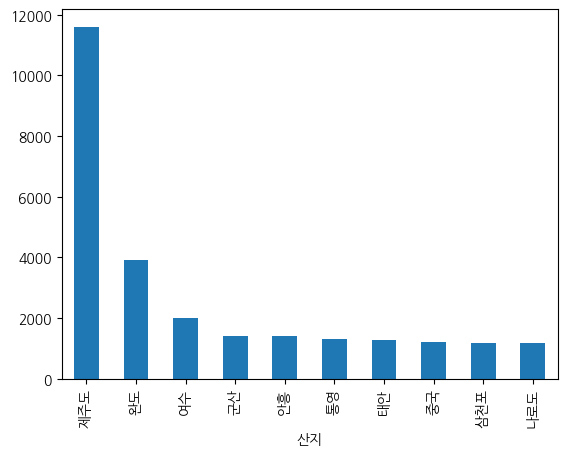

In [51]:
df['산지'].value_counts().head(10).plot(kind='bar')

In [59]:
df_na=df.dropna()

<Axes: xlabel='규격'>

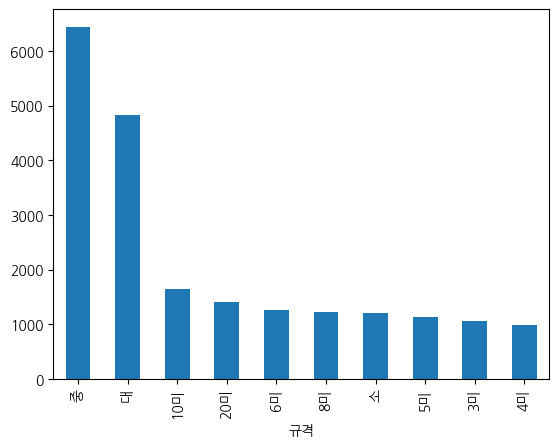

In [94]:
df['규격'].value_counts().head(10).plot(kind='bar')

In [97]:
df['중량'].value_counts().head(10)

중량
1.0     9324
10.0    8830
15.0    2208
5.0     2163
20.0    1349
8.0      947
6.0      907
4.0      887
3.0      861
7.0      609
Name: count, dtype: int64

In [73]:
df['규격_단위'].unique()

array(['미', '중', nan, '대', '소', '진통', '특대', 'UP', '파치', '바라', '소소', '단',
       '대중', '통', 'L', 'S', '손', '중소', 'up', '봉', '번', 'M1', 'M', '코',
       'M2'], dtype=object)

In [76]:
df['파일어종'].unique()

array(['갈치', '명태', '고등어', '우럭', '넙치', '꽁치', '대구', '바지락', '오징어', '전복',
       '조기', '홍어'], dtype=object)

In [79]:
df['포장'].value_counts()

포장
S/P        21854
kg          6852
box         4169
CT/(BT)     2434
PAN(펜)       703
c/s(상자)      684
미(마리)        364
그물망          291
가구            97
망             55
포             46
장              2
봉지             1
축              1
D/M            1
두름             1
Name: count, dtype: int64

In [99]:
df['포장_분류'].value_counts()

포장_분류
박스       29141
중량        6853
개수/묶음     1560
기타           1
Name: count, dtype: int64

In [103]:
df[df['파일어종']=='고등어']['중량'].value_counts()

중량
15.0    618
10.0    581
7.0     139
20.0    116
13.0    107
12.0     74
8.0      73
7.5      60
5.0      53
9.5      33
6.0      31
1.0      30
3.0      25
11.5     16
14.0     13
11.0     12
4.0      10
9.0       9
8.5       7
13.5      7
12.5      7
22.0      6
2.0       4
18.0      3
23.0      3
7.3       2
17.0      2
6.5       2
16.0      2
12.9      1
21.5      1
70.0      1
19.0      1
14.5      1
6.8       1
24.0      1
Name: count, dtype: int64

In [82]:
df[df['포장']=='box']

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종,포장_분류,규격_수치,규격_단위
340,(냉)은갈치,제주도,45미,box,270,10.0,"77,000","77,000","77,000",갈치,2021,3,2021-03-01,냉,은갈치,갈치,박스,45.0,미
1361,(선)은갈치,제주도,6미,box,1,3.0,"90,000","90,000","90,000",갈치,2021,9,2021-09-01,선,은갈치,갈치,박스,6.0,미
1362,(선)은갈치,제주도,30미,box,15,6.0,"17,000","17,000","17,000",갈치,2021,9,2021-09-01,선,은갈치,갈치,박스,30.0,미
1363,(선)은갈치,제주도,10미,box,63,4.5,"120,000","110,000","113,100",갈치,2021,9,2021-09-01,선,은갈치,갈치,박스,10.0,미
1378,(선)은갈치,제주도,6미,box,1,4.0,"130,000","130,000","130,000",갈치,2021,9,2021-09-01,선,은갈치,갈치,박스,6.0,미
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33155,(선)수조기,군산,중,box,8.4,1.0,"10,000","7,000","8,100",조기,2022,10,2022-10-01,선,수조기,조기,박스,NaN,중
33488,(선)백조기,제주도,8미,box,5.0,10.0,"60,000","60,000","60,000",조기,2023,1,2023-01-01,선,백조기,조기,박스,8.0,미
33520,(선)참조기,여수,중,box,5.0,14.0,"140,000","140,000","140,000",조기,2023,1,2023-01-01,선,참조기,조기,박스,NaN,중
33591,(냉)참조기,중국,61미,box,5.0,3.6,"60,000","60,000","60,000",조기,2023,1,2023-01-01,냉,참조기,조기,박스,61.0,미


In [86]:
df.corr(numeric_only=True)

,중량,year,month,규격_수치
중량,1.000000,-0.064746,-0.005863,0.193820
year,-0.064746,1.000000,0.035422,-0.026165
month,-0.005863,0.035422,1.000000,-0.019627
규격_수치,0.193820,-0.026165,-0.019627,1.000000


In [11]:
df[['규격', '규격_수치', '규격_단위']]

,규격,규격_수치,규격_단위
0,5미,5.0,미
1,10미,10.0,미
2,중,NaN,중
3,8미,8.0,미
4,중,NaN,중
...,...,...,...
37550,1미,1.0,미
37551,중,NaN,중
37552,5/6미,5.5,NaN
37553,6미,6.0,미


In [15]:
df.isna().sum()

어종           0
산지           0
규격           0
포장           0
수량           0
중량           0
낙찰고가         0
낙찰저가         0
평균가          0
파일어종         0
year         0
month        0
date         0
전처리          0
품목명          0
공통어종         0
포장_분류        0
규격_수치    13119
규격_단위     3123
dtype: int64

In [19]:
df[df['규격_단위'].isna()]

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종,포장_분류,규격_수치,규격_단위
12,(냉)갈치,중국,350/450,CT/(BT),70,7.5,"82,300","81,300","81,600",갈치,2021,1,2021-01-01,냉,갈치,갈치,박스,400.0,NaN
13,(냉)갈치,중국,300/400,CT/(BT),30,7.5,"71,000","71,000","71,000",갈치,2021,1,2021-01-01,냉,갈치,갈치,박스,350.0,NaN
14,(냉)갈치,제주도,40/45미,CT/(BT),550,10.0,"75,000","75,000","75,000",갈치,2021,1,2021-01-01,냉,갈치,갈치,박스,42.5,NaN
15,(냉)갈치,세네갈,500/700,CT/(BT),25,8.0,"90,000","73,000","76,400",갈치,2021,1,2021-01-01,냉,갈치,갈치,박스,600.0,NaN
135,(냉)은갈치,제주도,18/19미,S/P,4,10.0,"250,000","250,000","250,000",갈치,2021,1,2021-01-01,냉,은갈치,갈치,박스,18.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37534,(선)홍어,안흥,10/11미,kg,14.8,1.0,"4,000","4,000","4,000",홍어,2024,12,2024-12-01,선,홍어,홍어,중량,10.5,NaN
37537,(선)홍어,태안,5/10미,kg,752.2,1.0,"5,500","4,000","4,300",홍어,2024,12,2024-12-01,선,홍어,홍어,중량,7.5,NaN
37542,(선)홍어,안흥,3/4미,kg,366.4,1.0,"6,300","4,000","4,400",홍어,2024,12,2024-12-01,선,홍어,홍어,중량,3.5,NaN
37547,(선)홍어,안흥,2/3미,S/P,91.8,1.0,"8,000","7,000","7,600",홍어,2024,12,2024-12-01,선,홍어,홍어,박스,2.5,NaN


In [18]:
df[df['규격_수치'].isna()]

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종,포장_분류,규격_수치,규격_단위
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000","99,000",갈치,2021,1,2021-01-01,선,갈치,갈치,박스,NaN,중
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000","200,000",갈치,2021,1,2021-01-01,선,갈치,갈치,박스,NaN,중
7,(선)갈치,부산(기장),중,S/P,2,20.0,"380,000","380,000","380,000",갈치,2021,1,2021-01-01,선,갈치,갈치,박스,NaN,중
8,(선)갈치,삼천포,중,S/P,24,10.0,"15,000","15,000","15,000",갈치,2021,1,2021-01-01,선,갈치,갈치,박스,NaN,중
11,(냉)갈치,제주도,중,CT/(BT),250,10.0,"106,000","106,000","106,000",갈치,2021,1,2021-01-01,냉,갈치,갈치,박스,NaN,중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37535,(선)홍어,강화,대,S/P,95.6,1.0,"12,000","11,000","11,100",홍어,2024,12,2024-12-01,선,홍어,홍어,박스,NaN,대
37539,(선)홍어,서천,중,kg,129.2,1.0,"10,000","4,000","8,100",홍어,2024,12,2024-12-01,선,홍어,홍어,중량,NaN,중
37545,(선)홍어,안흥,중,kg,"1,062.1",1.0,"12,000","6,000","8,400",홍어,2024,12,2024-12-01,선,홍어,홍어,중량,NaN,중
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500","4,800",홍어,2024,12,2024-12-01,선,홍어,홍어,중량,NaN,중


In [33]:
df = pd.read_csv('./data/수산물_통합전처리_3컬럼.csv')

In [34]:
df

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000","110,000",갈치,2021,1,2021-01-01,선,갈치,갈치
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000","141,700",갈치,2021,1,2021-01-01,선,갈치,갈치
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000","99,000",갈치,2021,1,2021-01-01,선,갈치,갈치
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000","138,600",갈치,2021,1,2021-01-01,선,갈치,갈치
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000","200,000",갈치,2021,1,2021-01-01,선,갈치,갈치
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500","8,500",홍어,2024,12,2024-12-01,선,홍어,홍어
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500","4,800",홍어,2024,12,2024-12-01,선,홍어,홍어
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000","3,100",홍어,2024,12,2024-12-01,선,홍어,홍어
37553,(선)홍어,방어진,6미,kg,49,1.0,"4,000","4,000","4,000",홍어,2024,12,2024-12-01,선,홍어,홍어


In [65]:
df['포장'].unique()

array(['S/P', 'CT/(BT)', 'PAN(펜)', 'c/s(상자)', 'box', 'kg', '가구', '미(마리)',
       '그물망', '망', '포', '장', '봉지', '축', 'D/M', '두름'], dtype=object)

In [64]:
df.dropna(subset=['규격_수치'])

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종,포장_분류,규격_수치,규격_단위
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000","110,000",갈치,2021,1,2021-01-01,선,갈치,갈치,박스,5.0,미
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000","141,700",갈치,2021,1,2021-01-01,선,갈치,갈치,박스,10.0,미
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000","138,600",갈치,2021,1,2021-01-01,선,갈치,갈치,박스,8.0,미
5,(선)갈치,목포,8미,S/P,5,15.0,"200,000","100,000","170,000",갈치,2021,1,2021-01-01,선,갈치,갈치,박스,8.0,미
6,(선)갈치,목포,4미,S/P,5,15.0,"125,000","110,000","122,000",갈치,2021,1,2021-01-01,선,갈치,갈치,박스,4.0,미
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37548,(선)홍어,안흥,2미,S/P,1,23.0,"138,000","138,000","138,000",홍어,2024,12,2024-12-01,선,홍어,홍어,박스,2.0,미
37549,(선)홍어,목포,9미,kg,24,1.0,"5,000","5,000","5,000",홍어,2024,12,2024-12-01,선,홍어,홍어,중량,9.0,미
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500","8,500",홍어,2024,12,2024-12-01,선,홍어,홍어,중량,1.0,미
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000","3,100",홍어,2024,12,2024-12-01,선,홍어,홍어,중량,5.5,NaN


In [117]:
df['규격'].unique()

array(['5미', '10미', '중', '8미', '4미', '40미', '350/450', '300/400',
       '40/45미', '500/700', '대', '20미', '소', '6미', '2미', '23미', '12미',
       '15미', '3미', '13미', '진통', '39미', '7미', '24미', '45미', '11미', '32미',
       '9미', '16미', '27미', '26미', '17미', '25미', '14미', '18미', '35미',
       '30미', '28미', '특대', '53미', '18/19미', '24/25미', '700/900', '900UP',
       '38미', '55미', '44미', '21미', '6/7미', '9/10미', '54미', '50/51미', '1미',
       '19미', '58미', '31미', '50/60미', '37미', '31/32미', '42미', '28/29미',
       '43미', '21/22미', '550/650', '파치', '19/20미', '400/500', '65미',
       '83미', '48미', '70미', '49미', '25/26미', '23/24미', '77미', '69미',
       '72미', '75미', '50미', '22/23미', '47미', '66미', '68미', '78미',
       '27/28미', '30/31미', '22미', '29미', '41미', '33미', '35/36미', '62미',
       '36미', '51미', '바라', '35/40미', '25/30미', '52미', '42/43미', '30/35미',
       '60미', '120미', '150미', '100미', '37/38미', '34미', '88미', '46미',
       '33/34미', '38/39미', '20/25미', '12/13미', '40/41미', '44/45미',
       '41/42

In [49]:
a[df['규격_단위']=='대']

/var/folders/p6/kff249cn76scx1tv7jch4vym0000gn/T/ipykernel_69987/543434097.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a[df['규격_단위']=='대']


,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종,포장_분류,규격_수치,규격_단위
16,(냉)갈치,제주도,대,CT/(BT),300,10.0,"146,000","146,000","146,000",갈치,2021,1,2021-01-01,냉,갈치,갈치,박스,NaN,대
149,(냉)갈치,기타(국내),대,CT/(BT),300,10.0,"148,000","148,000","148,000",갈치,2021,2,2021-02-01,냉,갈치,갈치,박스,NaN,대
292,(선)은갈치,제주도,대,S/P,14,15.0,"162,000","100,000","150,100",갈치,2021,3,2021-03-01,선,은갈치,갈치,박스,NaN,대
404,(선)은갈치,제주도,대,S/P,3,20.0,"300,000","300,000","300,000",갈치,2021,4,2021-04-01,선,은갈치,갈치,박스,NaN,대
436,(선)은갈치,제주도,대,S/P,2,10.0,"350,000","300,000","325,000",갈치,2021,4,2021-04-01,선,은갈치,갈치,박스,NaN,대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37515,(선)홍어,목포,대,S/P,"1,016",1.0,"8,000","5,500","5,700",홍어,2024,12,2024-12-01,선,홍어,홍어,박스,NaN,대
37518,(선)홍어,방어진,대,S/P,516,1.0,"20,000","3,000","6,200",홍어,2024,12,2024-12-01,선,홍어,홍어,박스,NaN,대
37526,(선)홍어,방어진,대,kg,208.7,1.0,"10,000","5,000","7,200",홍어,2024,12,2024-12-01,선,홍어,홍어,중량,NaN,대
37535,(선)홍어,강화,대,S/P,95.6,1.0,"12,000","11,000","11,100",홍어,2024,12,2024-12-01,선,홍어,홍어,박스,NaN,대


In [69]:
df['규격_단위'].unique()

array(['미', '중', nan, '대', '소', '진통', '특대', 'UP', '파치', '바라', '소소', '단',
       '대중', '통', 'L', 'S', '손', '중소', 'up', '봉', '번', 'M1', 'M', '코',
       'M2'], dtype=object)

In [70]:
# 정보가 확연한 단위만 남기기
core_units = ['미', 'g', 'kg', '통', '봉', '손', '코']
grade_units = ['소', '중', '대', '특대', '중소', '진통', '대중', '소소', 'UP', 'up', 'L', 'S', 'M1', 'M', 'M2']

def process_regul_unit(unit):
    if unit in core_units:
        return unit
    elif unit in grade_units:
        return '등급'
    else:
        return np.nan # 또는 '기타'

df['규격_단위정제'] = df['규격_단위'].apply(process_regul_unit)


In [74]:
df[df['규격_단위정제']=='등급']['규격'].value_counts()

규격
중        6438
대        4823
소        1200
특대        156
M          97
L          90
진통         76
M2         59
소소         58
2L         48
900UP      34
S          20
중소         11
대중          5
100up       1
M1          1
3L          1
2S          1
Name: count, dtype: int64

In [77]:
grade_dict = {'소': 1, '중': 2, '대': 3}
df['규격_소중대_등급'] = df['규격_단위'].map(grade_dict)

# 수치값이 없으면 등급코드를 쓰고, 수치값 있으면 그걸 쓰는 방식도 가능
df['규격_최종값'] = df['규격_수치'].fillna(df['규격_소중대_등급'])

In [81]:
df.drop('규격_등급코드',axis=1, inplace=True)

In [115]:
df

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종,규격_수치,규격_단위,규격_등급코드
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000","110,000",갈치,2021,1,2021-01-01,선,갈치,갈치,5.0,미,NaN
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000","141,700",갈치,2021,1,2021-01-01,선,갈치,갈치,10.0,미,NaN
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000","99,000",갈치,2021,1,2021-01-01,선,갈치,갈치,NaN,중,2.0
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000","138,600",갈치,2021,1,2021-01-01,선,갈치,갈치,8.0,미,NaN
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000","200,000",갈치,2021,1,2021-01-01,선,갈치,갈치,NaN,중,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500","8,500",홍어,2024,12,2024-12-01,선,홍어,홍어,1.0,미,NaN
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500","4,800",홍어,2024,12,2024-12-01,선,홍어,홍어,NaN,중,2.0
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000","3,100",홍어,2024,12,2024-12-01,선,홍어,홍어,5.5,미,NaN
37553,(선)홍어,방어진,6미,kg,49,1.0,"4,000","4,000","4,000",홍어,2024,12,2024-12-01,선,홍어,홍어,6.0,미,NaN


In [98]:
df = pd.read_csv('./data/수산물_통합전처리_3컬럼.csv')

In [309]:
# 데이터 로딩
df = pd.read_csv('./data/수산물_통합전처리_3컬럼.csv')

def parse_standard(s):
    s = str(s).strip()
    # 범위: 30/35미, 40/45미 등
    range_match = re.match(r'^(\d+)[/](\d+).*미$', s)
    if range_match:
        num1 = int(range_match.group(1))
        num2 = int(range_match.group(2))
        return ((num1 + num2) / 2, '미')
    # 숫자미: 10미 등
    num_mi = re.match(r'^(\d+)\s*미$', s)
    if num_mi:
        return (int(num_mi.group(1)), '미')
    # 등급: 소,중,대
    if s in ['소', '중', '대']:
        return (np.nan, s)
    # 그외
    return (np.nan, np.nan)

# 규격 파싱 결과를 새로운 컬럼에 추가
df[['규격_수치', '규격_단위']] = df['규격'].apply(lambda x: pd.Series(parse_standard(x)))

# 등급 인코딩: 소=1, 중=2, 대=3
grade_dict = {'소': 1, '중': 2, '대': 3}
df['규격_등급코드'] = df['규격_단위'].map(grade_dict)

# "미", "소", "중", "대"만 포함한 행만 추출
filtered_df = df[df['규격_단위'].isin(['미','소','중','대'])].copy()

# 결과 확인 (필요시 .head())
print(filtered_df.head())

      어종   산지   규격   포장  수량    중량     낙찰고가     낙찰저가      평균가 파일어종  year  \
0  (선)갈치   목포   5미  S/P   1  15.0  110,000  110,000  110,000   갈치  2021   
1  (선)갈치   목포  10미  S/P  39  15.0  200,000   30,000  141,700   갈치  2021   
2  (선)갈치   목포    중  S/P   3  20.0  110,000   77,000   99,000   갈치  2021   
3  (선)갈치   목포   8미  S/P  25  20.0  155,000   50,000  138,600   갈치  2021   
4  (선)갈치  삼천포    중  S/P   2  20.0  200,000  200,000  200,000   갈치  2021   

   month        date 전처리 품목명 공통어종  규격_수치 규격_단위  규격_등급코드  
0      1  2021-01-01   선  갈치   갈치    5.0     미      NaN  
1      1  2021-01-01   선  갈치   갈치   10.0     미      NaN  
2      1  2021-01-01   선  갈치   갈치    NaN     중      2.0  
3      1  2021-01-01   선  갈치   갈치    8.0     미      NaN  
4      1  2021-01-01   선  갈치   갈치    NaN     중      2.0  


In [109]:
df['산지'].nunique()

88

In [110]:
df['어종'].nunique()

87

In [111]:
df['규격'].nunique()

252

In [112]:
df['포장'].nunique()

16

In [102]:
# 필요한 단위 리스트 지정
valid_units = ['미', '소', '중', '대']

# 규격_단위가 valid_units에 포함된 행만 필터링
df_filtered = df[df['규격_단위'].isin(valid_units)].copy()

# 결과 확인
print(df_filtered['규격_단위'].unique())


['미' '중' '대' '소']


In [105]:
df['규격_단위']

0        미
1        미
2        중
3        미
4        중
        ..
37550    미
37551    중
37552    미
37553    미
37554    대
Name: 규격_단위, Length: 37555, dtype: object

In [120]:
df['규격_등급코드'].fillna(0, inplace=True)

/var/folders/p6/kff249cn76scx1tv7jch4vym0000gn/T/ipykernel_69987/2427545158.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['규격_등급코드'].fillna(0, inplace=True)


In [122]:
df['규격_수치'].fillna(0, inplace=True)

/var/folders/p6/kff249cn76scx1tv7jch4vym0000gn/T/ipykernel_69987/2186472550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['규격_수치'].fillna(0, inplace=True)


In [125]:
df

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종,규격_수치,규격_단위,규격_등급코드,포장_분류
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000","110,000",갈치,2021,1,2021-01-01,선,갈치,갈치,5.0,미,0.0,박스
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000","141,700",갈치,2021,1,2021-01-01,선,갈치,갈치,10.0,미,0.0,박스
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000","99,000",갈치,2021,1,2021-01-01,선,갈치,갈치,0.0,중,2.0,박스
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000","138,600",갈치,2021,1,2021-01-01,선,갈치,갈치,8.0,미,0.0,박스
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000","200,000",갈치,2021,1,2021-01-01,선,갈치,갈치,0.0,중,2.0,박스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500","8,500",홍어,2024,12,2024-12-01,선,홍어,홍어,1.0,미,0.0,중량
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500","4,800",홍어,2024,12,2024-12-01,선,홍어,홍어,0.0,중,2.0,중량
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000","3,100",홍어,2024,12,2024-12-01,선,홍어,홍어,5.5,미,0.0,중량
37553,(선)홍어,방어진,6미,kg,49,1.0,"4,000","4,000","4,000",홍어,2024,12,2024-12-01,선,홍어,홍어,6.0,미,0.0,중량


In [137]:
df['어종'].nunique()

87

In [128]:
df['파일어종'].unique()

array(['갈치', '명태', '고등어', '우럭', '넙치', '꽁치', '대구', '바지락', '오징어', '전복',
       '조기', '홍어'], dtype=object)

In [132]:
df['산지'].value_counts().head(15)

산지
제주도       11605
완도         3916
여수         1998
군산         1401
안흥         1393
통영         1298
태안         1274
중국         1207
삼천포        1192
나로도        1186
남해          879
속초          864
포항          763
부산(기장)      718
기타(국내)      709
Name: count, dtype: int64

In [133]:
df['산지'].unique()

array(['목포', '삼천포', '부산(기장)', '추자도', '제주도', '중국', '세네갈', '기타(국내)', '태안',
       '신안', '통영', '군산', '대천', '장항', '안흥', '서천', '대부도', '서산', '사천',
       '베네수엘라', '나로도', '남해', '완도', '보령', '진도', '거제도', '격포', '영광', '인천',
       '오만', '속초', '필리핀', '모로코', '대만', '인도', '기타(수입)', '고흥', '흑산도', '일본',
       '러시아', '미국', '(원양)러시아', '베트남', '노르웨이', '임원', '여수', '강구', '동해시',
       '포항', '축산', '후포', '스코틀랜드', '방어진', '고창', '(원양)노르웨이', '영국', '감포',
       '죽변', '충무', '마산', '순천', '안면도', '당진', '화성', '거진', '고성', '구룡포', '강화',
       '연평도', '대진', '부안', '영흥도', '바누아투', '삼척', '기타(원양)', '울진', '아르헨티나',
       '(원양)포클랜드', '페루', '주문진', '스페인', '뉴질랜드', '에콰도르', '우루과이', '칠레',
       '(원양)아르헨티나', '영덕', '호주'], dtype=object)

In [135]:
df.head(5)

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종,규격_수치,규격_단위,규격_등급코드,포장_분류
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000","110,000",갈치,2021,1,2021-01-01,선,갈치,갈치,5.0,미,0.0,박스
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000","141,700",갈치,2021,1,2021-01-01,선,갈치,갈치,10.0,미,0.0,박스
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000","99,000",갈치,2021,1,2021-01-01,선,갈치,갈치,0.0,중,2.0,박스
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000","138,600",갈치,2021,1,2021-01-01,선,갈치,갈치,8.0,미,0.0,박스
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000","200,000",갈치,2021,1,2021-01-01,선,갈치,갈치,0.0,중,2.0,박스


In [373]:

# 그룹화 함수 정의
def group_area(area):
    수입산 = ['중국', '세네갈', '베네수엘라', '오만', '필리핀', '모로코', '대만', '인도', '일본',
            '러시아', '미국', '베트남', '스코틀랜드', '영국', '바누아투', '아르헨티나', '페루',
            '스페인', '뉴질랜드', '에콰도르', '우루과이', '칠레', '호주']

    원양산 = ['(원양)러시아', '(원양)노르웨이', '(원양)포클랜드', '(원양)아르헨티나', '기타(원양)']

    국내산_주요 = ['제주도', '완도', '여수', '군산', '안흥', '통영', '태안', '삼천포', '나로도',
                 '남해', '속초', '포항', '부산(기장)', '신안', '대천', '장항', '서천', '대부도',
                 '서산', '사천', '고흥', '흑산도', '임원', '강구', '동해시', '축산', '후포',
                 '방어진', '고창', '감포', '죽변', '충무', '마산', '순천', '안면도', '당진',
                 '화성', '거진', '고성', '구룡포', '강화', '연평도', '대진', '부안', '영흥도',
                 '삼척', '울진', '주문진', '영덕']
    
    기타_국내 = ['목포', '기타(국내)']

    if area in 수입산:
        return '수입산'
    elif area in 원양산:
        return '원양산'
    elif area in 국내산_주요:
        return '국내산_주요'  # 주요 국내산은 개별 유지
    elif area in 기타_국내:
        return '기타(국내)'
    else:
        return '기타'

# 데이터프레임 사용 시
df['산지_그룹화'] = df['산지'].apply(group_area)

In [144]:
df['산지_그룹화'].unique()

array(['기타(국내)', '국내산_주요', '기타', '수입산', '원양산'], dtype=object)

In [386]:
df

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,...,month,date,전처리,품목명,공통어종,규격_수치,규격_단위,규격_등급코드,규격_등급,산지_그룹화
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000","110,000",갈치,...,1,2021-01-01,선,갈치,갈치,5.0,미,NaN,대,기타(국내)
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000","141,700",갈치,...,1,2021-01-01,선,갈치,갈치,10.0,미,NaN,중,기타(국내)
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000","99,000",갈치,...,1,2021-01-01,선,갈치,갈치,NaN,중,2.0,중,기타(국내)
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000","138,600",갈치,...,1,2021-01-01,선,갈치,갈치,8.0,미,NaN,중,기타(국내)
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000","200,000",갈치,...,1,2021-01-01,선,갈치,갈치,NaN,중,2.0,중,국내산_주요
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500","8,500",홍어,...,12,2024-12-01,선,홍어,홍어,1.0,미,NaN,소,국내산_주요
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500","4,800",홍어,...,12,2024-12-01,선,홍어,홍어,NaN,중,2.0,중,기타
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000","3,100",홍어,...,12,2024-12-01,선,홍어,홍어,5.5,미,NaN,대,국내산_주요
37553,(선)홍어,방어진,6미,kg,49,1.0,"4,000","4,000","4,000",홍어,...,12,2024-12-01,선,홍어,홍어,6.0,미,NaN,대,국내산_주요


In [391]:
df.dropna(subset=['규격_등급'], inplace=True)

In [409]:
df

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,...,date,전처리,품목명,공통어종,규격_수치,규격_단위,규격_등급코드,규격_등급,산지_그룹화,포장_분류
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000","110,000",갈치,...,2021-01-01,선,갈치,갈치,5.0,미,NaN,대,기타(국내),박스
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000","141,700",갈치,...,2021-01-01,선,갈치,갈치,10.0,미,NaN,중,기타(국내),박스
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000","99,000",갈치,...,2021-01-01,선,갈치,갈치,NaN,중,2.0,중,기타(국내),박스
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000","138,600",갈치,...,2021-01-01,선,갈치,갈치,8.0,미,NaN,중,기타(국내),박스
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000","200,000",갈치,...,2021-01-01,선,갈치,갈치,NaN,중,2.0,중,국내산_주요,박스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500","8,500",홍어,...,2024-12-01,선,홍어,홍어,1.0,미,NaN,소,국내산_주요,중량
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500","4,800",홍어,...,2024-12-01,선,홍어,홍어,NaN,중,2.0,중,기타,중량
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000","3,100",홍어,...,2024-12-01,선,홍어,홍어,5.5,미,NaN,대,국내산_주요,중량
37553,(선)홍어,방어진,6미,kg,49,1.0,"4,000","4,000","4,000",홍어,...,2024-12-01,선,홍어,홍어,6.0,미,NaN,대,국내산_주요,중량


In [425]:
y = df['평균가']

In [395]:
X = df[['파일어종','산지_그룹화','규격_등급','포장_분류','수량','중량']]

In [157]:
df['파일어종'].unique()

array(['갈치', '명태', '고등어', '우럭', '넙치', '꽁치', '대구', '바지락', '오징어', '전복',
       '조기', '홍어'], dtype=object)

In [397]:
df['산지_그룹화'].unique()

array(['기타(국내)', '국내산_주요', '기타', '수입산', '원양산'], dtype=object)

In [396]:
df['규격_등급'].unique()

array(['대', '중', '소'], dtype=object)

In [410]:
df['포장_분류'].unique()

array(['박스', '개수/묶음', '중량', '기타'], dtype=object)

In [398]:
X.head(2)

,파일어종,산지_그룹화,규격_등급,포장_분류,수량,중량
0,갈치,기타(국내),대,박스,1,15.0
1,갈치,기타(국내),중,박스,39,15.0


In [401]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32418 entries, 0 to 37554
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   파일어종    32418 non-null  object 
 1   산지_그룹화  32418 non-null  object 
 2   규격_등급   32418 non-null  object 
 3   포장_분류   32418 non-null  object 
 4   수량      32418 non-null  float64
 5   중량      32418 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.7+ MB


In [400]:
X['수량'] = X['수량'].str.replace(',', '').astype(float)

/var/folders/p6/kff249cn76scx1tv7jch4vym0000gn/T/ipykernel_69987/1512186872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['수량'] = X['수량'].str.replace(',', '').astype(float)


In [436]:
y=y.to_frame()

In [438]:
y

,평균가
0,110000.0
1,141700.0
2,99000.0
3,138600.0
4,200000.0
...,...
37550,8500.0
37551,4800.0
37552,3100.0
37553,4000.0


In [429]:
y['평균가'] = y['평균가'].str.replace(',','').astype(float)

In [174]:
X['수량'] = X['수량'].str.replace(',', '').astype(float)

/var/folders/p6/kff249cn76scx1tv7jch4vym0000gn/T/ipykernel_69987/1512186872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['수량'] = X['수량'].str.replace(',', '').astype(float)


In [ ]:
X['수량'] = X['수량'].str.replace(',', '').astype(float)

In [430]:
series=y['평균가']

In [431]:
series = y.squeeze()

In [432]:
y=series

In [407]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [404]:
X.head(2)

,파일어종,산지_그룹화,규격_등급,포장_분류,수량,중량
0,갈치,기타(국내),대,박스,1.0,15.0
1,갈치,기타(국내),중,박스,39.0,15.0


In [413]:
ct = ColumnTransformer([('onehot', OneHotEncoder(), [0,1,2,3]),
                       ('scaler',MinMaxScaler(), [4,5])])

In [414]:
X_scaled=ct.fit_transform(X)

In [439]:
scaler = MinMaxScaler()

In [435]:
y

0        110000.0
1        141700.0
2         99000.0
3        138600.0
4        200000.0
           ...   
37550      8500.0
37551      4800.0
37552      3100.0
37553      4000.0
37554      9200.0
Name: 평균가, Length: 32418, dtype: float64

In [440]:
y_scaled=scaler.fit_transform(y)

In [441]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [443]:
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [444]:
model.fit(X_train, y_train)


/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [445]:
y_pred = model.predict(X_test)

In [446]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix


In [447]:

mse = mean_squared_error(y_test, y_pred)


In [448]:
mse

0.0012790892553657999

In [449]:
r2_score(y_test,y_pred)

0.4770936414444935

In [450]:
y_test

array([[0.00158147],
       [0.01995442],
       [0.06972417],
       ...,
       [0.02553607],
       [0.01362854],
       [0.00669799]])

In [481]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(

In [245]:
X[(X['파일어종']=='갈치') & (X['산지_그룹화']=='국내산_주요')]

,파일어종,산지_그룹화,포장_분류,수량,중량
4,갈치,국내산_주요,박스,2.0,20.0
7,갈치,국내산_주요,박스,2.0,20.0
8,갈치,국내산_주요,박스,24.0,10.0
11,갈치,국내산_주요,박스,250.0,10.0
14,갈치,국내산_주요,박스,550.0,10.0
...,...,...,...,...,...
10104,갈치,국내산_주요,박스,1.0,2.3
10105,갈치,국내산_주요,박스,1.0,3.7
10106,갈치,국내산_주요,박스,1.0,10.0
10107,갈치,국내산_주요,박스,7.0,3.0


In [254]:
X['포장_분류'].unique()

array(['박스', '개수/묶음', '중량', '기타'], dtype=object)

In [272]:
X

,파일어종,산지_그룹화,포장_분류,수량,중량
0,갈치,기타(국내),박스,1.0,15.0
1,갈치,기타(국내),박스,39.0,15.0
2,갈치,기타(국내),박스,3.0,20.0
3,갈치,기타(국내),박스,25.0,20.0
4,갈치,국내산_주요,박스,2.0,20.0
...,...,...,...,...,...
37550,홍어,국내산_주요,중량,9.4,1.0
37551,홍어,기타,중량,127.3,1.0
37552,홍어,국내산_주요,중량,638.3,1.0
37553,홍어,국내산_주요,중량,49.0,1.0


In [253]:
y

,평균가
0,110000.0
1,141700.0
2,99000.0
3,138600.0
4,200000.0
...,...
37550,8500.0
37551,4800.0
37552,3100.0
37553,4000.0


In [461]:
X.head(10)

,파일어종,산지_그룹화,규격_등급,포장_분류,수량,중량
0,갈치,기타(국내),대,박스,1.0,15.0
1,갈치,기타(국내),중,박스,39.0,15.0
2,갈치,기타(국내),중,박스,3.0,20.0
3,갈치,기타(국내),중,박스,25.0,20.0
4,갈치,국내산_주요,중,박스,2.0,20.0
5,갈치,기타(국내),중,박스,5.0,15.0
6,갈치,기타(국내),대,박스,5.0,15.0
7,갈치,국내산_주요,중,박스,2.0,20.0
8,갈치,국내산_주요,중,박스,24.0,10.0
9,갈치,기타(국내),중,박스,23.0,20.0


In [471]:
new_data = [{'파일어종':'갈치', '산지_그룹화':'국내산_주요', '규격_등급':'중','포장_분류':'박스', '수량':2, '중량':20}]

In [472]:
new_df=pd.DataFrame(new_data)

In [473]:
new_data=ct.transform(new_df)

In [474]:
new_data_pred=model.predict(new_data)

In [475]:
new_data_pred.reshape(-1,1)

array([[0.14645503]])

In [476]:
new_data_pred_original=scaler.inverse_transform(new_data_pred.reshape(-1,1))

In [477]:
new_data_pred_original

array([[314963.66666667]])

In [478]:
y.head(10)

,평균가
0,110000.0
1,141700.0
2,99000.0
3,138600.0
4,200000.0
5,170000.0
6,122000.0
7,380000.0
8,15000.0
9,144600.0


In [480]:
r2_score(y_test, y_pred)

0.4770936414444935

In [322]:
import numpy as np

def classify_size(row):
    fish = row['파일어종']
    value = row['규격_수치']
    unit = row['규격_단위']
    
    # 이미 등급형 단위면 그대로 반환
    if unit in ['소', '중', '대']:
        return unit

    # 어종별 미/코/g 등급 변환
    if fish == '명태':
        if unit == '미':
            if value >= 15: return '소'
            elif 8 <= value <= 14: return '중'
            elif value <= 7: return '대'
    elif fish == '고등어':
        if unit == '미':
            if value >= 20: return '소'
            elif 10 <= value <= 19: return '중'
            elif value <= 9: return '대'
    elif fish == '우럭':
        if unit == '미':
            if value >= 12: return '소'
            elif 7 <= value <= 11: return '중'
            elif value <= 6: return '대'
    elif fish == '갈치':
        if unit == '미':
            if value >= 12: return '소'
            elif 6 <= value <= 11: return '중'
            elif value <= 5: return '대'
    elif fish == '넙치':
        if unit == '미':
            if value >= 15: return '소'
            elif 8 <= value <= 14: return '중'
            elif value <= 5: return '대'
    elif fish == '오징어':
        if unit == '코':
            if value >= 30: return '소'
            elif 11 <= value <= 29: return '중'
            elif value <= 10: return '대'
    elif fish == '전복':
        if unit == '미':
            if value >= 15: return '소'
            elif 10 <= value <= 14: return '중'
            elif value <= 9: return '대'
    elif fish == '조기':
        if unit == '미':
            if value >= 20: return '소'
            elif 10 <= value <= 19: return '중'
            elif value <= 9: return '대'
    elif fish == '홍어':
        # 홍어 예시: 크기 정보 없으면 아래는 샘플
        if unit == '미':
            if value < 2: return '소'
            elif 2 <= value < 5: return '중'
            elif value >= 5: return '대'
    elif fish == '꽁치':
        if unit == '미':
            if value >= 40: return '소'
            elif 20 <= value <= 39: return '중'
            elif value <= 19: return '대'
    elif fish == '대구':
        if unit == '미':
            if value >= 12: return '소'
            elif 6 <= value <= 11: return '중'
            elif value <= 5: return '대'
    elif fish == '바지락':
        if unit == '미':
            if value < 30: return '소'
            elif 30 <= value <= 50: return '중'
            elif value > 50: return '대'
    return np.nan

# 적용 예시 (어종, 규격_수치, 규격_단위가 있는 DataFrame)
df['규격_등급'] = df.apply(classify_size, axis=1)


In [305]:
df['규격'].value_counts()

규격
중      6438
대      4823
10미    1642
20미    1405
6미     1258
8미     1228
소      1200
5미     1126
3미     1064
4미      985
Name: count, dtype: int64

In [302]:
df[df['규격_등급'].isna()].head(10)

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,...,date,전처리,품목명,공통어종,규격_수치,규격_단위,규격_등급코드,포장_분류,산지_그룹화,규격_등급
12,(냉)갈치,중국,350/450,CT/(BT),70,7.5,"82,300","81,300","81,600",갈치,...,2021-01-01,냉,갈치,갈치,0.0,NaN,0.0,박스,수입산,NaN
13,(냉)갈치,중국,300/400,CT/(BT),30,7.5,"71,000","71,000","71,000",갈치,...,2021-01-01,냉,갈치,갈치,0.0,NaN,0.0,박스,수입산,NaN
15,(냉)갈치,세네갈,500/700,CT/(BT),25,8.0,"90,000","73,000","76,400",갈치,...,2021-01-01,냉,갈치,갈치,0.0,NaN,0.0,박스,수입산,NaN
43,(선)은갈치,제주도,진통,S/P,1,10.0,"22,000","22,000","22,000",갈치,...,2021-01-01,선,은갈치,갈치,0.0,NaN,0.0,박스,국내산_주요,NaN
65,(선)은갈치,제주도,진통,S/P,1,9.0,"25,000","25,000","25,000",갈치,...,2021-01-01,선,은갈치,갈치,0.0,NaN,0.0,박스,국내산_주요,NaN
130,(선)은갈치,제주도,특대,S/P,3,8.0,"55,000","55,000","55,000",갈치,...,2021-01-01,선,은갈치,갈치,0.0,NaN,0.0,박스,국내산_주요,NaN
145,(냉)갈치,세네갈,700/900,CT/(BT),30,8.0,"73,900","73,900","73,900",갈치,...,2021-02-01,냉,갈치,갈치,0.0,NaN,0.0,박스,수입산,NaN
146,(냉)갈치,세네갈,900UP,CT/(BT),30,8.0,"73,400","73,400","73,400",갈치,...,2021-02-01,냉,갈치,갈치,0.0,NaN,0.0,박스,수입산,NaN
147,(냉)갈치,세네갈,500/700,CT/(BT),70,8.0,"73,400","71,900","72,300",갈치,...,2021-02-01,냉,갈치,갈치,0.0,NaN,0.0,박스,수입산,NaN
238,(냉)갈치,세네갈,700/900,CT/(BT),130,8.0,"73,100","71,100","71,600",갈치,...,2021-03-01,냉,갈치,갈치,0.0,NaN,0.0,박스,수입산,NaN


In [327]:
import numpy as np
import re

def parse_regulation_value(s):
    s = str(s).strip()
    # 범위(슬래시) 표기 처리: '350/450'
    range_match = re.match(r'^(\d+)[/](\d+)$', s)
    if range_match:
        num1 = int(range_match.group(1))
        num2 = int(range_match.group(2))
        return (num1 + num2) / 2
    # 숫자만 있을 경우
    num_match = re.match(r'^(\d+)$', s)
    if num_match:
        return int(num_match.group(1))
    # 그 외(이미 등급명 등)에는 np.nan 반환
    return np.nan

# 적용 예시(규격_수치 만들 때)
df['규격_수치'] = df['규격'].apply(parse_regulation_value)


In [328]:
df.isna().sum()

어종             0
산지             0
규격             0
포장             0
수량             0
중량             0
낙찰고가           0
낙찰저가           0
평균가            0
파일어종           0
year           0
month          0
date           0
전처리            0
품목명            0
공통어종           0
규격_수치      36947
규격_단위       2072
규격_등급코드    25094
규격_등급       5185
dtype: int64

In [329]:
df[df['규격_등급'].isna()]

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종,규격_수치,규격_단위,규격_등급코드,규격_등급
12,(냉)갈치,중국,350/450,CT/(BT),70,7.5,"82,300","81,300","81,600",갈치,2021,1,2021-01-01,냉,갈치,갈치,400.0,NaN,NaN,NaN
13,(냉)갈치,중국,300/400,CT/(BT),30,7.5,"71,000","71,000","71,000",갈치,2021,1,2021-01-01,냉,갈치,갈치,350.0,NaN,NaN,NaN
15,(냉)갈치,세네갈,500/700,CT/(BT),25,8.0,"90,000","73,000","76,400",갈치,2021,1,2021-01-01,냉,갈치,갈치,600.0,NaN,NaN,NaN
43,(선)은갈치,제주도,진통,S/P,1,10.0,"22,000","22,000","22,000",갈치,2021,1,2021-01-01,선,은갈치,갈치,NaN,NaN,NaN,NaN
65,(선)은갈치,제주도,진통,S/P,1,9.0,"25,000","25,000","25,000",갈치,2021,1,2021-01-01,선,은갈치,갈치,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37335,(선)홍어,군산,특대,S/P,520,1.0,"4,000","3,500","3,600",홍어,2024,8,2024-08-01,선,홍어,홍어,NaN,NaN,NaN,NaN
37350,(선)홍어,군산,특대,S/P,4,20.0,"70,000","70,000","70,000",홍어,2024,8,2024-08-01,선,홍어,홍어,NaN,NaN,NaN,NaN
37378,(선)홍어,군산,특대,S/P,14,20.0,"100,000","90,000","92,900",홍어,2024,9,2024-09-01,선,홍어,홍어,NaN,NaN,NaN,NaN
37389,(선)홍어,군산,특대,S/P,380,1.0,"5,000","3,700","4,300",홍어,2024,10,2024-10-01,선,홍어,홍어,NaN,NaN,NaN,NaN


In [353]:
import re
import numpy as np

def parse_regulation(s):
    """
    ex) '350/450미' or '10미' 등 규격 문자열에서 수치(평균)와 단위 추출
    return: (규격_수치, 규격_단위)
    """
    s = str(s).strip()
    # 범위+단위: '350/450미'
    match = re.match(r'^(\d+)[/](\d+)\s*([가-힣A-Za-z]+)$', s)
    if match:
        num1 = int(match.group(1))
        num2 = int(match.group(2))
        unit = match.group(3)
        return ( (num1 + num2) / 2, unit )
    # 숫자+단위: '10미'
    match = re.match(r'^(\d+)\s*([가-힣A-Za-z]+)$', s)
    if match:
        num = int(match.group(1))
        unit = match.group(2)
        return (num, unit)
    # 이미 소중대 등급 단위
    if s in ['소', '중', '대']:
        return (np.nan, s)
    return (np.nan, np.nan)

# 적용예시
df[['규격_수치','규격_단위']] = df['규격'].apply(lambda x: pd.Series(parse_regulation(x)))


In [359]:
def parse_regulation(s):
    s = str(s).strip()
    # 범위+단위: 예) 350/450미
    match = re.match(r'^(\d+)[/](\d+)\s*([가-힣A-Za-z]+)$', s)
    if match:
        num1 = int(match.group(1))
        num2 = int(match.group(2))
        unit = match.group(3)
        return ((num1 + num2) / 2, unit)
    # 단위 없는 범위: 예) '350/450'
    match = re.match(r'^(\d+)[/](\d+)$', s)
    if match:
        num1 = int(match.group(1))
        num2 = int(match.group(2))
        return ((num1 + num2) / 2, np.nan)  # 단위 없음
    # 숫자+단위: 예) 10미
    match = re.match(r'^(\d+)\s*([가-힣A-Za-z]+)$', s)
    if match:
        num = int(match.group(1))
        unit = match.group(2)
        return (num, unit)
    # 소,중,대 등 이미 등급명일 때
    if s in ['소', '중', '대']:
        return (np.nan, s)
    return (np.nan, np.nan)

# 적용 예시
df[['규격_수치', '규격_단위']] = df['규격'].apply(lambda x: pd.Series(parse_regulation(x)))


In [360]:
def classify_size(row):
    fish = row['파일어종']
    value = row['규격_수치']
    unit = row['규격_단위']
    # 이미 등급형 단위면 그대로 반환
    if unit in ['소', '중', '대']:
        return unit
    # 어종별 기준
    if fish == '명태':
        if unit == '미':
            if value >= 15: return '소'
            elif 8 <= value <= 14: return '중'
            elif value <= 7: return '대'
    elif fish == '고등어':
        if unit == '미':
            if value >= 20: return '소'
            elif 10 <= value <= 19: return '중'
            elif value <= 9: return '대'
    elif fish == '우럭':
        if unit == '미':
            if value >= 12: return '소'
            elif 7 <= value <= 11: return '중'
            elif value <= 6: return '대'
    elif fish == '갈치':
        if unit == '미':
            if value >= 12: return '소'
            elif 6 <= value <= 11: return '중'
            elif value <= 5: return '대'
    elif fish == '넙치':
        if unit == '미':
            if value >= 15: return '소'
            elif 8 <= value <= 14: return '중'
            elif value <= 5: return '대'
    elif fish == '오징어':
        if unit == '코':
            if value >= 30: return '소'
            elif 11 <= value <= 29: return '중'
            elif value <= 10: return '대'
    elif fish == '전복':
        if unit == '미':
            if value >= 15: return '소'
            elif 10 <= value <= 14: return '중'
            elif value <= 9: return '대'
    elif fish == '조기':
        if unit == '미':
            if value >= 20: return '소'
            elif 10 <= value <= 19: return '중'
            elif value <= 9: return '대'
    elif fish == '홍어':
        if unit == '미':
            if value < 2: return '소'
            elif 2 <= value < 5: return '중'
            elif value >= 5: return '대'
    elif fish == '꽁치':
        if unit == '미':
            if value >= 40: return '소'
            elif 20 <= value <= 39: return '중'
            elif value <= 19: return '대'
    elif fish == '대구':
        if unit == '미':
            if value >= 12: return '소'
            elif 6 <= value <= 11: return '중'
            elif value <= 5: return '대'
    elif fish == '바지락':
        if unit == '미':
            if value < 30: return '소'
            elif 30 <= value <= 50: return '중'
            elif value > 50: return '대'
    return np.nan


In [365]:
df['규격_등급'] = df.apply(classify_size, axis=1)


In [367]:
df[df['규격_등급'].isna()]

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종,규격_수치,규격_단위,규격_등급코드,규격_등급
12,(냉)갈치,중국,350/450,CT/(BT),70,7.5,"82,300","81,300","81,600",갈치,2021,1,2021-01-01,냉,갈치,갈치,400.0,NaN,NaN,NaN
13,(냉)갈치,중국,300/400,CT/(BT),30,7.5,"71,000","71,000","71,000",갈치,2021,1,2021-01-01,냉,갈치,갈치,350.0,NaN,NaN,NaN
15,(냉)갈치,세네갈,500/700,CT/(BT),25,8.0,"90,000","73,000","76,400",갈치,2021,1,2021-01-01,냉,갈치,갈치,600.0,NaN,NaN,NaN
43,(선)은갈치,제주도,진통,S/P,1,10.0,"22,000","22,000","22,000",갈치,2021,1,2021-01-01,선,은갈치,갈치,NaN,NaN,NaN,NaN
65,(선)은갈치,제주도,진통,S/P,1,9.0,"25,000","25,000","25,000",갈치,2021,1,2021-01-01,선,은갈치,갈치,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37335,(선)홍어,군산,특대,S/P,520,1.0,"4,000","3,500","3,600",홍어,2024,8,2024-08-01,선,홍어,홍어,NaN,NaN,NaN,NaN
37350,(선)홍어,군산,특대,S/P,4,20.0,"70,000","70,000","70,000",홍어,2024,8,2024-08-01,선,홍어,홍어,NaN,NaN,NaN,NaN
37378,(선)홍어,군산,특대,S/P,14,20.0,"100,000","90,000","92,900",홍어,2024,9,2024-09-01,선,홍어,홍어,NaN,NaN,NaN,NaN
37389,(선)홍어,군산,특대,S/P,380,1.0,"5,000","3,700","4,300",홍어,2024,10,2024-10-01,선,홍어,홍어,NaN,NaN,NaN,NaN


In [368]:
df['파일어종'].value_counts()

파일어종
갈치     10109
조기      5337
오징어     5011
전복      3476
바지락     3332
우럭      2144
넙치      2144
고등어     2052
대구      1753
홍어      1339
꽁치       430
명태       428
Name: count, dtype: int64

In [372]:
df

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종,규격_수치,규격_단위,규격_등급코드,규격_등급
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000","110,000",갈치,2021,1,2021-01-01,선,갈치,갈치,5.0,미,NaN,대
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000","141,700",갈치,2021,1,2021-01-01,선,갈치,갈치,10.0,미,NaN,중
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000","99,000",갈치,2021,1,2021-01-01,선,갈치,갈치,NaN,중,2.0,중
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000","138,600",갈치,2021,1,2021-01-01,선,갈치,갈치,8.0,미,NaN,중
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000","200,000",갈치,2021,1,2021-01-01,선,갈치,갈치,NaN,중,2.0,중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500","8,500",홍어,2024,12,2024-12-01,선,홍어,홍어,1.0,미,NaN,소
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500","4,800",홍어,2024,12,2024-12-01,선,홍어,홍어,NaN,중,2.0,중
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000","3,100",홍어,2024,12,2024-12-01,선,홍어,홍어,5.5,미,NaN,대
37553,(선)홍어,방어진,6미,kg,49,1.0,"4,000","4,000","4,000",홍어,2024,12,2024-12-01,선,홍어,홍어,6.0,미,NaN,대
